##### Respuesta a la serie de ejercicios 2 publicada en:https://github.com/lbenet/2016-1_TemasSelectosFisComp
##### Autor:Raúl Álvarez Mendoza.


## Ejercicio 1:

Para este ejercicio, usaremos la función _derivada2_ de la Tarea 1 y llamamos a PyPlot:

In [11]:
using PyPlot

INFO: Loading help data...


In [1]:
function derivada2(f,xo)
    """Obtiene una aproximación a la derivada de 
    f(x) alrededor de x_0"""
    h=1e-10 #Por la tarea 1 sabemos que este es un buen valor de h
    derivada= (f(xo+h)-f(xo-h))/(2h)
    return derivada
end

derivada2 (generic function with 1 method)

Ahora, implementamos el método de Newton:

In [2]:
function metnewton(f,x0,i=0)
    if (f(x0)==0) || (i==50) #Checa si f evaluada en x0 es cercana a 0 o si el número de iteraciones ya alcanzó el máximo, devuelve x0
        return x0    
    else
        i+=1 #Le sumamos 1 al contador de iteraciones
        x0=x0-(f(x0)/derivada2(f,x0)) #Calculamos el nuevo x0 usando la definición del método de newton
        return metnewton(f,x0,i)  #Llamada recursiva usando el nuevo x0  
    end
end
        
    
        
    

metnewton (generic function with 2 methods)

Para responder a la pregunta 1, definimos la siguiente función:

In [3]:
f(x)=x^2-2 #Definimos la primera función f(x) de la que obtendremos sus raíces

f (generic function with 1 method)

Y obtenemos sus raíces usando nuestra función _metnewton_:

In [4]:
raices1=[metnewton(f,1.0),metnewton(f,-1.0)] #Creamos un vector con las raíces de f

2-element Array{Float64,1}:
  1.41421
 -1.41421

Verificamos si efectivamente son raíces de $f(x)$:

In [5]:
for i in raices1  #Evaluamos f en cada raíz obtenida por el método de Newton
    println(f(i))
end


-4.440892098500626e-16
-4.440892098500626e-16


Observamos que son buenas aproximaciones si consideramos el error de _derivada2_, el _h_ utilizado y el límite de iteraciones permitido.

Para responder a la pregunta 2,definimos la función $g(z)=z^3-1$ y encontramos sus raíces:

In [6]:
g(z)=z^3-1 #Definimos g(z)

g (generic function with 1 method)

In [7]:
raices2=[metnewton(g,1.0),metnewton(g,im),metnewton(g,-im)]  #Encontramos las 3 raíces usando las condiciones iniciales 1.0, im y -im.

3-element Array{Complex{Float64},1}:
  1.0+0.0im     
 -0.5+0.866025im
 -0.5-0.866025im

Comprobamos que efectivamente sean raíces de _g_:

In [8]:
for n in raices2  #Evaluamos g(z) en cada raíz obtenida con metnewton.
    println(g(n))
end

0.0 + 0.0im
-2.220446049250313e-16 + 1.1102230246251565e-16im
-2.220446049250313e-16 - 1.1102230246251565e-16im


Por lo que vemos que obtuvimos una buena aproximación de las raíces de $g(z)$.

Para estudiar la convergencia del método de Newton, construimos una matriz que tiene como entrada $i,j$ a la raíz a la cual _metnewton_ converge al ser evaluada en un $x0$ del plano complejo, el cual identificamos con $(i,j)$:

In [9]:
function matriz(f,a,step)
    """Recibe como primer argumento a una función,
    como segundo argumento un "a" con el cual construiremos
    un rectángulo [-a,a]x[-a*im,a*im], 
    y como tercer argumento recibe a un "n" que indica 
    el número de números deseados en nuestros intervalos."""
    r=[k for k in -a:step:a] #Definimos [-a,a]
    comp=im*r          #Definimos [-im*a,im*a]
    M=[metnewton(f,i+j) for i in r,j in comp] #Construimos nuestra matriz  cuya entrada i,j es metnewton en un x0.
    return M
end
    

matriz (generic function with 1 method)

Procedemos a graficar los resultados:

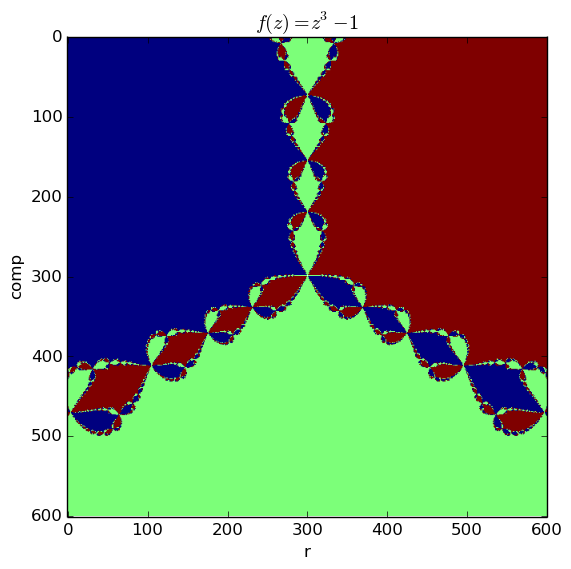

PyObject <matplotlib.text.Text object at 0xaaa959ac>

In [12]:
imshow(imag(matriz(g,3,1e-2)))
xlabel("r")
ylabel("comp")
title(L"$f(z)=z^3-1$")


Se observan tres regiones importantes de color azul,rojo y verde. Los números complejos que se encuentran en la región de color rojo, eventualmente convergen a la raíz $z_1=1+0i$, los que se encuentran en la región azul convergen a la raíz $z_2=e^{\frac{2i\pi}{3}}$ que fue aproximada por nuestra función _metnewton_ como $-0.5+0.866025i$, y finalmente, los complejos en la región verde convergen a la raíz $z_3=e^{\frac{-2i\pi}{3}}$, aproximadamente $-0.5-0.866025i$.

Pero lo interesante es observar la frontera de estas regiones.
Estos son los complejos $z_0$ en los que _metnewton_ se comporta de forma impredecible, ya que estos números son equidistantes a al menos 2 raíces.

Podemos decir que este conjunto de complejos forma un fractal, ya que por definición un fractal es un objeto geométrico cuya estructura básica, fragmentada o irregular, se repite a diferentes escalas, y al observar la gráfica observamos que las fronteras ente cada región de convergencia siguen un patrón geométrico.

Ahora grafiquemos la matriz de otra función:


In [13]:
h(z)=(z-1)*((z-2)^2)*(z-3) #Definimos h(z) que tiene una raíz de multiplicidad 2.

h (generic function with 1 method)

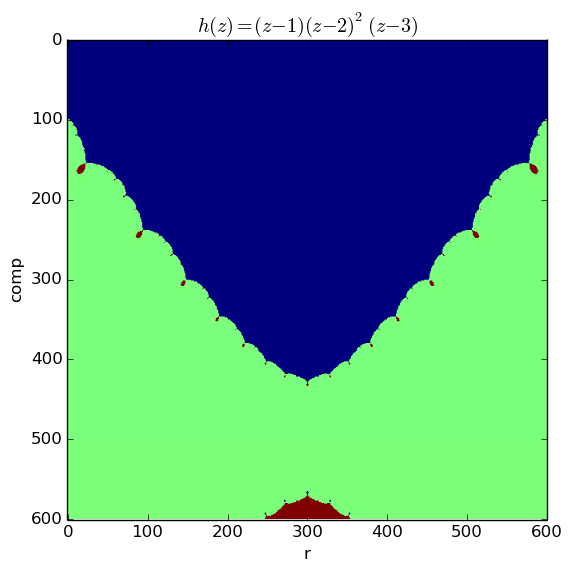

PyObject <matplotlib.text.Text object at 0xaa83e0ac>

In [23]:
imshow(real(matriz(h,3,1e-2)))
xlabel("r")
ylabel("comp")
title(L"$h(z)=(z-1)(z-2)^2(z-3)$")

Para hacer una ampliación, basta con modificar los parámetros "step" y "a"(se hará en el ejercicio 3 ya que graficar usando derivada2 es muy tardado).

## Ejercicio 2:

Para responder a la primera pregunta, primero definimos 2 cadenas:

In [1]:
cadena_1="Hola"

"Hola"

In [2]:
cadena_2="Mundo"

"Mundo"

Y ahora tratamos de sumarlas:

In [3]:
cadena_1+cadena_2

LoadError: `+` has no method matching +(::ASCIIString, ::ASCIIString)
while loading In[3], in expression starting on line 1

Observamos que no es posible ya que + no sabe que hacer si ambos argumentos son de tipo "ASCIIString".

Ahora para la pregunta 2, multiplicaremos a nuestras cadenas:

In [4]:
cadena_1*cadena_2

"HolaMundo"

Vemos que multiplicar cadenas si es posible y es equivalente a concatenarlas.

Para la pregunta 3, sabemos que podemos definir un nuevo método de + que al recibir como argumento a dos cadenas las concatene (como en Python), aunque en realidad podemos hacer que + realizara cualquier operación deseada sobre las dos cadenas.
Por ejemplo, podríamos hacer que al sumar dos cadenas, + aparte de concatenarlas coloque un espacio entre ellas:

In [5]:
+(x::ASCIIString,y::ASCIIString)=x*" "*y #Definimos un nuevo método a + cuando ambos argumentos son cadenasASCII.

+ (generic function with 120 methods)

Ya que definimos el nuevo método, vamos a sumar nuestras cadenas:

In [6]:
cadena_1+cadena_2

"Hola Mundo"

Pero vemos que la siguiente suma nos da error (gracias a la sugerencia de Uriel):

In [7]:
cadena_3="mundonòn"

"mundonòn"

In [8]:
cadena_1+cadena_3

LoadError: `+` has no method matching +(::ASCIIString, ::UTF8String)
while loading In[8], in expression starting on line 1

Podemos corregir este error definiendo la suma de cadenas con el abstract type "String", que es supertype de ASCIIString,UTF8String:

In [13]:
+(x::String,y::String)=x*" "*y    #Definimos un nuevo método a + cuando ambos argumentos tienen como supertype a "String"

+ (generic function with 121 methods)

In [14]:
cadena_1+cadena_3   #Sumamos las cadenas de nuevo

"Hola mundonòn"

Vemos ahora que nuestra suma de cadenas funciona correctamente.

## Ejercicio 3: Diferenciación automática

Primero invocamos a nuestro módulo AutDiff.jl:

In [2]:
using AutDiff

Probamos si `dual_var()` en `x0` nos regresa al Dual esperado:

In [3]:
dual_var(1.0)  #Probando con un número real.

Dual{Float64}(1.0,1.0)

In [4]:
dual_var(π)  #Probando con un número irracional.

Dual{Float64}(3.141592653589793,1.0)

In [5]:
dual_var(5) #Probando con un número entero

Dual{Float64}(5.0,1.0)

Efectivamente, *dual_var* hace lo esperado.


Definimos la siguiente función, con la que probaremos varias cosas a la vez, como la multiplicación de un real por un Dual, el logaritmo de un Dual, elevar al cubo a un Dual y sumarle un número o constante a nuestro Dual:

$$f(x)=2x+log(x)-x^3+2$$

De la cual sabemos que su primera derivada es:

$$f\prime(x)=2+\frac{1}{x} -3x^2$$

Por lo que si $x_0 =2$, esperamos que $f\prime(2)=-9.5$.
Entonces, usando Duales calcularemos $f\prime(2)$:

In [6]:
x0=dual_var(2.0) #Creamos un dual que corresponde a x0
f(x)=2x+log(x)-x^3+2 #Definimos f(x).
f(x0)  #Evaluamos f(x) en x0

Dual{Float64}(-1.3068528194400546,-9.5)

Vemos que el valor de la derivada obtenido es exactamente el mismo al esperado.
Ahora vamos a evaluar $f(x)$ en varios `x0` para ver si el comportamiento persiste:

In [7]:
vectorx0=[dual_var(i) for i in 1:5.0:100]  #Creamos un vector con varios valores de x0

20-element Array{Dual{Float64},1}:
  Dual{Float64}(1.0,1.0)
  Dual{Float64}(6.0,1.0)
 Dual{Float64}(11.0,1.0)
 Dual{Float64}(16.0,1.0)
 Dual{Float64}(21.0,1.0)
 Dual{Float64}(26.0,1.0)
 Dual{Float64}(31.0,1.0)
 Dual{Float64}(36.0,1.0)
 Dual{Float64}(41.0,1.0)
 Dual{Float64}(46.0,1.0)
 Dual{Float64}(51.0,1.0)
 Dual{Float64}(56.0,1.0)
 Dual{Float64}(61.0,1.0)
 Dual{Float64}(66.0,1.0)
 Dual{Float64}(71.0,1.0)
 Dual{Float64}(76.0,1.0)
 Dual{Float64}(81.0,1.0)
 Dual{Float64}(86.0,1.0)
 Dual{Float64}(91.0,1.0)
 Dual{Float64}(96.0,1.0)

In [12]:
df(x)=2+(1/x)-3x^2 #Definimos la derivada de f(x)

df (generic function with 1 method)

In [13]:
res1=Array(Float64,0)  #Creamos un vector vacío
for j in vectorx0      #Evaluamos g(x) en cada x0 y luego anexamos a nuestro vector vacío la segunda entrada del Dual resultante.
    m=f(j).fp
    push!(res1,m)
end

In [14]:
res2=Array(Float64,0)  #Creamos otro vector vacío
for n in vectorx0      #Evaluamos dg(x) en cada x0 y anexamos la imagen al vector res2
    push!(res2,df(n.f))
end

In [15]:
[res1 res2]  #Comparamos las derivadas obtenidas vs las esperadas.

20x2 Array{Float64,2}:
      0.0         0.0  
   -105.833    -105.833
   -360.909    -360.909
   -765.938    -765.938
  -1320.95    -1320.95 
  -2025.96    -2025.96 
  -2880.97    -2880.97 
  -3885.97    -3885.97 
  -5040.98    -5040.98 
  -6345.98    -6345.98 
  -7800.98    -7800.98 
  -9405.98    -9405.98 
 -11161.0    -11161.0  
 -13066.0    -13066.0  
 -15121.0    -15121.0  
 -17326.0    -17326.0  
 -19681.0    -19681.0  
 -22186.0    -22186.0  
 -24841.0    -24841.0  
 -27646.0    -27646.0  

Vemos que para todos los `x0`, se obtuvieron las derivadas exactas usando Duales.
Ahora probaremos con casos más complicados en donde la regla de la cadena se tiene que usar más de una vez.

Definimos las siguientes funciones y sus respectivas derivadas:

In [16]:
g(x)=exp(sin(cos(x^3))) #Definimos g(x)

g (generic function with 1 method)

In [17]:
dg(x)=(-3exp(sin(cos(x^3))))*((x^2)cos(cos(x^3))sin(x^3)) #Definimos a la derivada de g(x)

dg (generic function with 1 method)

In [18]:
h(x)=log(x^2)/exp(x^3)  #Definimos h(x)

h (generic function with 1 method)

In [19]:
dh(x)=(exp(-x^3)*(2-(3x^3)log(x^2)))/x #Definimos a la derivada de h(x)

dh (generic function with 1 method)

Creamos un nuevo vector de $x_0$ para evaluar a $g(x)$:

In [20]:
vector2x0=[dual_var(i) for i in -100.0:15.0:100.0]  #Creamos un vector con varios valores de x0

14-element Array{Dual{Float64},1}:
 Dual{Float64}(-100.0,1.0)
  Dual{Float64}(-85.0,1.0)
  Dual{Float64}(-70.0,1.0)
  Dual{Float64}(-55.0,1.0)
  Dual{Float64}(-40.0,1.0)
  Dual{Float64}(-25.0,1.0)
  Dual{Float64}(-10.0,1.0)
    Dual{Float64}(5.0,1.0)
   Dual{Float64}(20.0,1.0)
   Dual{Float64}(35.0,1.0)
   Dual{Float64}(50.0,1.0)
   Dual{Float64}(65.0,1.0)
   Dual{Float64}(80.0,1.0)
   Dual{Float64}(95.0,1.0)

Ahora evaluaremos a $g(x)$ y a su derivada en todos los valores x0 de nuestro vector:

In [21]:
res3=Array(Float64,0)  #Creamos un vector vacío
for j in vector2x0      #Evaluamos g(x) en cada x0 y luego anexamos a nuestro vector vacío la segunda entrada del Dual resultante.
    m=g(j).fp
    push!(res3,m)
end

In [22]:
res4=Array(Float64,0)  #Creamos otro vector vacío
for n in vector2x0      #Evaluamos dg(x) en cada x0 y anexamos la imagen al vector res2
    z=n.f
    push!(res4,dg(z))
end

In [23]:
[res3 res4]

14x2 Array{Float64,2}:
 -13921.5     -13921.5   
   5078.6       5078.6   
  16923.5      16923.5   
   1688.98      1688.98  
  -3343.48     -3343.48  
  -2284.65     -2284.65  
    357.68       357.68  
     66.2141      66.2141
  -1275.84     -1275.84  
   4064.39      4064.39  
  -2313.91     -2313.91  
   7734.98      7734.98  
  -9290.67     -9290.67  
  -1254.83     -1254.83  

Observamos que la derivada obtenida por medio de Duales es nuevamente idéntica a la esperada.
Ahora creamos otro vector de $x_0$ para evaluar a $h(x)$ y su derivada:

In [24]:
vector3x0=[dual_var(i) for i in -1.0:0.05:1.0]  #Creamos un vector con varios valores de x0

41-element Array{Dual{Float64},1}:
  Dual{Float64}(-1.0,1.0)
 Dual{Float64}(-0.95,1.0)
  Dual{Float64}(-0.9,1.0)
 Dual{Float64}(-0.85,1.0)
  Dual{Float64}(-0.8,1.0)
 Dual{Float64}(-0.75,1.0)
  Dual{Float64}(-0.7,1.0)
 Dual{Float64}(-0.65,1.0)
  Dual{Float64}(-0.6,1.0)
 Dual{Float64}(-0.55,1.0)
  Dual{Float64}(-0.5,1.0)
 Dual{Float64}(-0.45,1.0)
  Dual{Float64}(-0.4,1.0)
                        ⋮
  Dual{Float64}(0.45,1.0)
   Dual{Float64}(0.5,1.0)
  Dual{Float64}(0.55,1.0)
   Dual{Float64}(0.6,1.0)
  Dual{Float64}(0.65,1.0)
   Dual{Float64}(0.7,1.0)
  Dual{Float64}(0.75,1.0)
   Dual{Float64}(0.8,1.0)
  Dual{Float64}(0.85,1.0)
   Dual{Float64}(0.9,1.0)
  Dual{Float64}(0.95,1.0)
   Dual{Float64}(1.0,1.0)

In [25]:
res5=Array(Float64,0)  #Creamos un vector vacío
for j in vector3x0      #Evaluamos g(x) en cada x0 y luego anexamos a nuestro vector vacío la segunda entrada del Dual resultante.
    m=h(j).fp
    push!(res5,m)
end

In [26]:
res6=Array(Float64,0)  #Creamos otro vector vacío
for n in vector3x0     #Evaluamos dg(x) en cada x0 y anexamos la imagen al vector res6
    push!(res6,dh(n.f))
end

In [27]:
[res5 res6]

41x2 Array{Float64,2}:
 -5.43656   -5.43656 
 -4.30738   -4.30738 
 -3.54519   -3.54519 
 -3.04635   -3.04635 
 -2.74177   -2.74177 
 -2.58569   -2.58569 
 -2.54851   -2.54851 
 -2.61219   -2.61219 
 -2.7676    -2.7676  
 -3.01311   -3.01311 
 -3.35444   -3.35444 
 -3.80572   -3.80572 
 -4.39269   -4.39269 
  ⋮                  
  4.94304    4.94304 
  4.44754    4.44754 
  3.99778    3.99778 
  3.57482    3.57482 
  3.16781    3.16781 
  2.77168    2.77168 
  2.38559    2.38559 
  2.01176    2.01176 
  1.65444    1.65444 
  1.31899    1.31899 
  1.01105    1.01105 
  0.735759   0.735759

Y de nuevo, observamos que la derivada de $h(x)$ calculada usando Duales es exacta. Por lo tanto el error solo depende del epsilon de la máquina.

Por último, implementamos el método de Newton usando Duales:

In [29]:
function metnewton2(f,x0,i=0)
    x0dual=dual_var(x0)
    if (f(x0)==0) || (i==50) #Checa si f evaluada en x0 es cercana a 0 o si el número de iteraciones ya alcanzó el máximo, devuelve x0
        return x0    
    else
        i+=1 #Le sumamos 1 al contador de iteraciones
        xn=x0-(f(x0)/f(x0dual).fp) #Calculamos el nuevo x0 usando la definición del método de newton
        return metnewton(f,xn,i)  #Llamada recursiva usando el nuevo x0  
    end
end

metnewton2 (generic function with 2 methods)

Modificamos la función _matriz_ para que utilize _metnewton2_:

In [87]:
function matriz2(f,a,step)
    """Recibe como primer argumento a una función,
    como segundo argumento un "a" con el cual construiremos
    un rectángulo [-a,a]x[-a*im,a*im], 
    y como tercer argumento recibe a un "n" que indica 
    el número de números deseados en nuestros intervalos."""
    r=[k for k in -a:step:a] #Definimos [-a,a] 
    comp=im*r          #Definimos [-im*a,im*a]
    M=[metnewton2(f,i+j) for i in r,j in comp] #Construimos nuestra matriz  cuya entrada i,j es metnewton en un x0.
    return M
end

matriz2 (generic function with 2 methods)

Y volvemos a graficar:

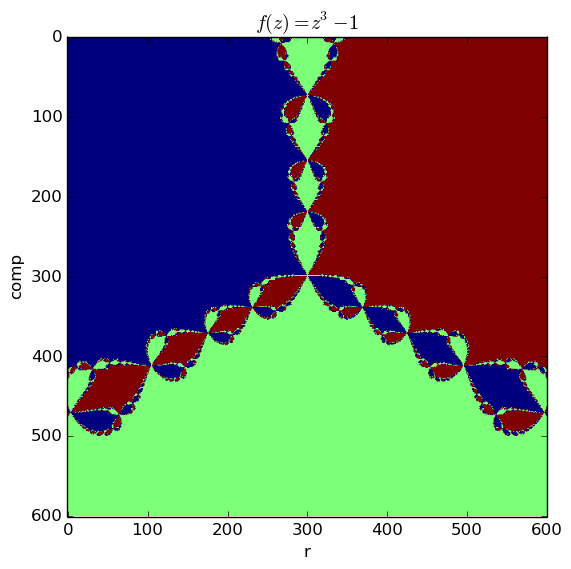

PyObject <matplotlib.text.Text object at 0xaa9b69ac>

In [42]:
imshow(imag(matriz2(g,3,1e-2)))
xlabel("r")
ylabel("comp")
title(L"$f(z)=z^3-1$")

Como quedamos en el ejercicio 1, se graficará una ampliación del 1000%:

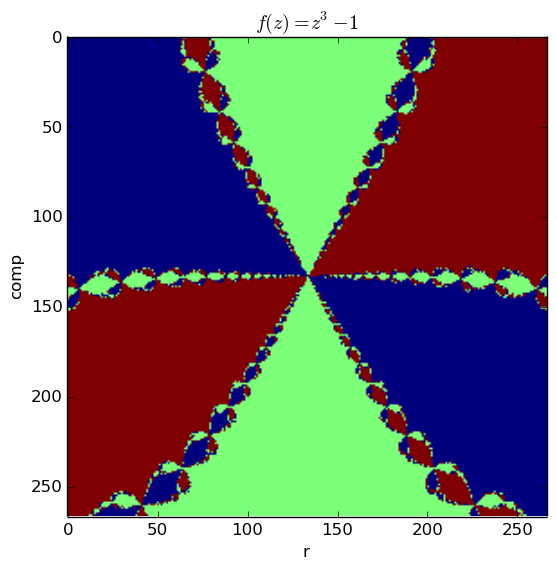

PyObject <matplotlib.text.Text object at 0xa966a0ac>

In [70]:
imshow(imag(matriz2(g,4/10,(3e-2)/10)))  
xlabel("r")
ylabel("comp")
title(L"$f(z)=z^3-1$")

Graficamos la matriz de convergencia de otras funciones:

In [88]:
y(z)=tan(z)-1   #Experimentamos con funciones trigonométricas

y (generic function with 1 method)

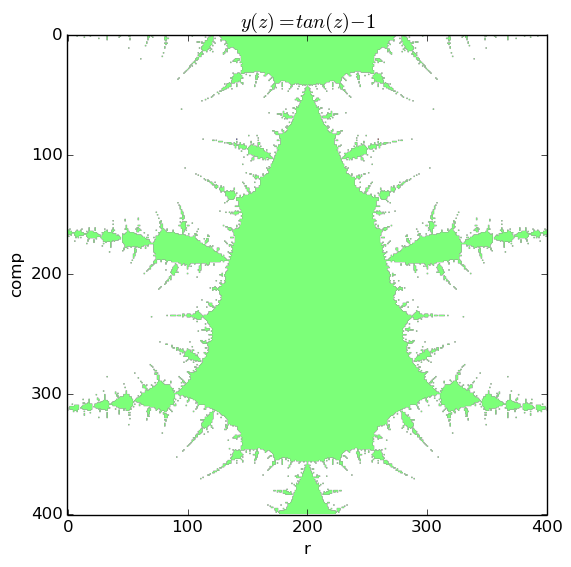

PyObject <matplotlib.text.Text object at 0xa678482c>

In [94]:
imshow(imag(matriz2(y,2,1e-2)))
xlabel("r")
ylabel("comp")
title(L"$y(z)=tan(z)-1$")

In [100]:
w(z)=exp(z)-1      #Experimentamos con funciones trascendentes

w (generic function with 1 method)

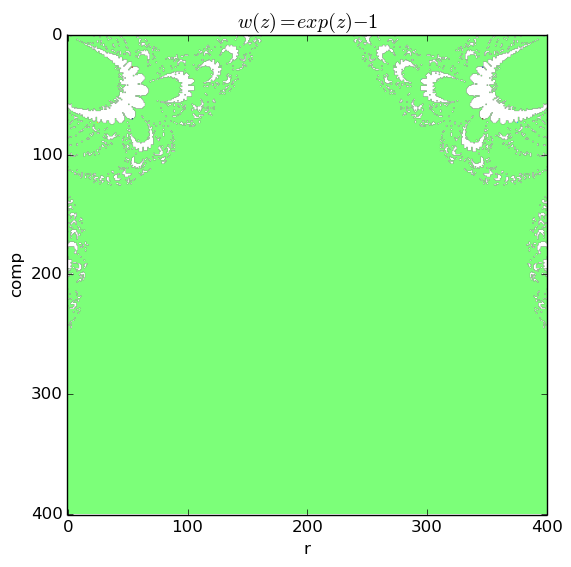

PyObject <matplotlib.text.Text object at 0xa618b4ec>

In [101]:
imshow(imag(matriz2(w,2,1e-2)))
xlabel("r")
ylabel("comp")
title(L"$w(z)=exp(z)-1$")

In [110]:
x(z)=(z^2-(1+3im)2)*(z^2-(5+im)2)*(z^2-(3-2im)2)   #Una función con 6 raíces.

x (generic function with 1 method)

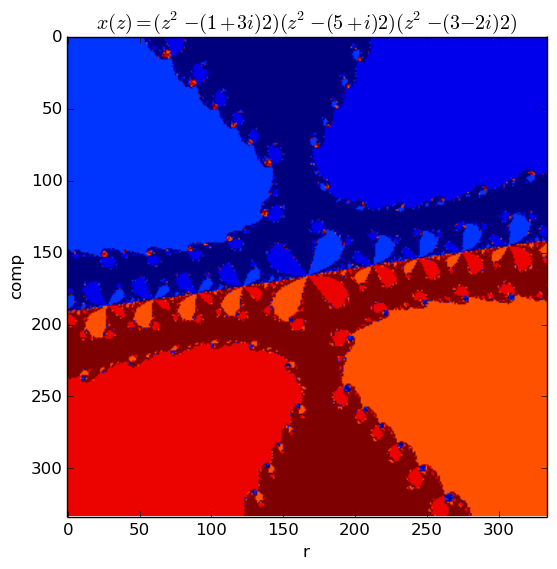

PyObject <matplotlib.text.Text object at 0xa4e3a58c>

In [116]:
imshow(real(matriz2(x,5,3e-2)))
xlabel("r")
ylabel("comp")
title(L"$x(z)=(z^2-(1+3i)2)(z^2-(5+i)2)(z^2-(3-2i)2)$")